# Aprendizado supervisionado

## Modelos de regressão

#### 1. Import das bibliotecas

In [54]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub

#metricas
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 

#modelos
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor  

from xgboost import XGBRegressor

#### 2. Download e exploração do dataset

O dataset escolhido para essa demonstração é o "House Sales in King County, USA"do Kaggle, que contém informações sobre preços de casas em King County, estado do Washington.

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

**Column defintions:**
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:02<00:00, 317kB/s]

Extracting files...


Path to dataset files: C:\Users\alice\.cache\kagglehub\datasets\harlfoxem\housesalesprediction\versions\1


In [5]:
# Identifica onde os dados estão alocados
os.listdir(path)

['kc_house_data.csv']

In [6]:
# Carrega dados 
file_path = os.path.join(path, "kc_house_data.csv")
df = pd.read_csv(file_path)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.shape

(21613, 21)

Neste  conjunto  de  dados  há  21  colunas  ao  todo.  Para  fins  didáticos,  vamos trabalhar com estas:
* id -ID único para cada casa.
* date -Data da casa a venda.
* price -Preço da casa.
* bedrooms -Número de quartos.
* bathrooms -Número de banheiros, o valor .5 conta como lavabo.
* sqft_living -Área em m² do espaço interior.
* sqft_lot -Área em m² do espaço do terreno.
* floors -Número de andares.
* waterfront -Se tem vista para o mar (1) ou não (0). (categórico)

In [9]:
df = df[['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront']]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0


Vemos aqui que faz sentido remover as colunas 'id' e 'date' para o modelo, ficando com o total de 7 colunas e 21613 linhas

In [10]:
colunas_para_remover = ['id', 'date']
df = df.drop(colunas_para_remover, axis=1) #axis = 1 identifica que as colunas que devem ser removidas, nao linhas
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0


In [11]:
rows, cols = df.shape 
print(f"Linhas: {rows}. Colunas: {cols}")

Linhas: 21613. Colunas: 7


#### 3. Separa entre treino e teste

In [12]:
x = df.drop('price', axis=1)
y = df['price']

In [13]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,3,1.00,1180,5650,1.0,0
1,3,2.25,2570,7242,2.0,0
2,2,1.00,770,10000,1.0,0
3,4,3.00,1960,5000,1.0,0
4,3,2.00,1680,8080,1.0,0
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0
21609,4,2.50,2310,5813,2.0,0
21610,2,0.75,1020,1350,2.0,0
21611,3,2.50,1600,2388,2.0,0


In [14]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

#### 4. Normalização dos dados

In [16]:
min_max_scaler = StandardScaler() 
x = min_max_scaler.fit_transform(x)

In [17]:
x

array([[-0.39873715, -1.44746357, -0.97983502, -0.22832133, -0.915427  ,
        -0.08717263],
       [-0.39873715,  0.1756067 ,  0.53363434, -0.18988538,  0.93650577,
        -0.08717263],
       [-1.47395936, -1.44746357, -1.42625404, -0.12329847, -0.915427  ,
        -0.08717263],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, -0.33213703,  0.93650577,
        -0.08717263],
       [-0.39873715,  0.50022075, -0.52252773, -0.30707641,  0.93650577,
        -0.08717263],
       [-1.47395936, -1.77207762, -1.15404732, -0.33875227,  0.93650577,
        -0.08717263]])

#### 5. Separação entre treino e teste

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [20]:
print(f'Exemplos para o treinamento: {len(y_train)}. E para o teste: {len(y_test)}')

Exemplos para o treinamento: 15129. E para o teste: 6484


#### 6. Modelos

##### 6.1 Regressão linear

A regressão linear é um dos modelos mais simples — e ao mesmo tempo mais importantes — dentro da família dos modelos de regressão, cujo objetivo é modelar a relação entre uma variável dependente contínua (o alvo, geralmente chamada de y) e uma ou mais variáveis independentes (X).

A regressão linear assume que essa relação pode ser aproximada por uma função linear: 𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+⋯+𝛽n𝑥n+𝜀

Onde:
* β₀ (intercepto) → valor de y quando todas as variáveis são zero
* βᵢ → quanto y muda quando xᵢ aumenta uma unidade
* ε (erro) → tudo que o modelo não consegue explicar

O modelo aprende os β minimizando o erro (normalmente o erro quadrático médio).

**Suposições importantes:**

Aqui entra o lado “estatístico” do modelo. A regressão linear funciona melhor quando:
* Linearidade: A relação entre X e y é aproximadamente linear.
* Independência dos erros: Os erros não são correlacionados entre si.
* Homoscedasticidade: A variância dos erros é constante.
* Normalidade dos erros: Importante para inferência estatística (intervalos, p-values).
* Pouca multicolinearidade:  Variáveis muito correlacionadas entre si atrapalham a interpretação.

**Interpretação dos coeficientes:**

Exemplo: “Se β₁ = 5000, então cada unidade a mais em x₁ aumenta o preço em 5 mil, mantendo o resto constante.”


In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 58290430743.821526
RMSE: 241434.1126349413
MAPE: 0.3468906172169919


##### 6.2 KNN Regressor

O K-Nearest Neighbors Regressor é um modelo de regressão não paramétrico e baseado em instâncias:

*"Para prever o valor de um ponto novo, o modelo olha para os K pontos mais próximos no conjunto de treino e faz uma média (ou média ponderada) dos valores de y desses vizinhos."*

Exemplo (preço de casas):
1. casa nova com certas características
2. encontra as K casas mais parecidas
3. o preço previsto é a média dos preços delas

O KNN depende totalmente de uma métrica de distância:
| Distância           | Ideia principal                 | Sensível à escala | Quando usar                       | Observação                  |
| ------------------- | ------------------------------- | ----------------- | --------------------------------- | --------------------------- |
| **Euclidiana (L2)** | Distância em linha reta         | ✅ Sim             | Dados contínuos, casos gerais     | Padrão em KNN               |
| **Manhattan (L1)**  | Soma das diferenças absolutas   | ✅ Sim             | Dados com outliers, alta dimensão | Mais robusta que L2         |
| **Minkowski**       | Generalização de L1 e L2        | ✅ Sim             | Quando quer flexibilidade         | L1 e L2 são casos especiais |
| **Chebyshev**       | Maior diferença entre variáveis | ✅ Sim             | Quando um grande desvio domina    | Olha só o “pior caso”       |
| **Coseno**          | Ângulo entre vetores            | ❌ Não             | Texto, vetores esparsos           | Ignora magnitude            |
| **Hamming**         | Contagem de diferenças          | ❌ Não             | Dados categóricos/binários        | Não serve p/ contínuos      |
| **Mahalanobis**     | Corrigida por correlação        | ⚠️ Parcial        | Variáveis correlacionadas         | Computacionalmente cara     |


⚠️ Por isso a escala das variáveis é crucial e quase sempre usamos normalização ou padronização

**O hiperparâmetro K:**

O valor de K controla o comportamento do modelo:
* K pequeno: modelo flexível, captura detalhes locais, risco de overfitting
* K grande: modelo mais suave, menos sensível a ruído, risco de underfitting
k é normalmente escolhido por validação cruzada.

**Funciona bem em situações onde:**
* Relações não lineares
* Padrões locais
* Datasets pequenos/médios
* Quando interpretação não é prioridade

**Limitações:**
* Alta dimensionalidade (maldição da dimensionalidade)
* Datasets grandes (predição lenta)
* Muita variável irrelevante
* Outliers (especialmente com K pequeno)

K=7

In [32]:
model = KNeighborsRegressor(n_neighbors=7, metric = 'euclidean')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 56929973907.05955
RMSE: 238600.02914304
MAPE: 0.3246391981351605


K=11

In [33]:
model = KNeighborsRegressor(n_neighbors=11, metric = 'euclidean')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 54279481897.12415
RMSE: 232979.57399120668
MAPE: 0.3182259751426981


Estudo para identificar MAPE por K

In [38]:
len(y_test)

6484

Como MAPE é uma medida de erro, quanto menor, melhor. Note como o erro aumenta a medida em que aumentando K:

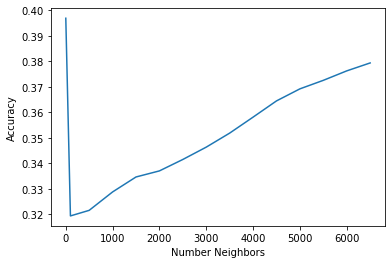

In [42]:
#Relação acurácia com a quantidade de vizinhos 
number_neighbors = (1, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500) 
mape = dict() 

for i in number_neighbors:
    knn_model = KNeighborsRegressor(n_neighbors=i, metric = 'euclidean')
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    mape[i] = mean_absolute_percentage_error(y_test, y_pred)

plt.plot(number_neighbors, mape.values())
plt.xlabel("Number Neighbors")
plt.ylabel("MAPE")
plt.show()

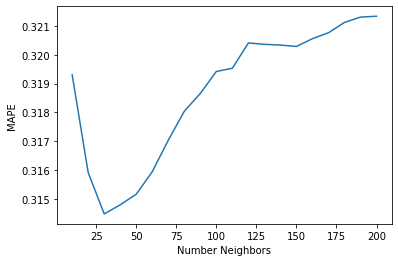

In [45]:
#Relação acurácia com a quantidade de vizinhos 
number_neighbors = (10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200) 
mape = dict() 

for i in number_neighbors:
    knn_model = KNeighborsRegressor(n_neighbors=i, metric = 'euclidean')
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    mape[i] = mean_absolute_percentage_error(y_test, y_pred)

plt.plot(number_neighbors, mape.values())
plt.xlabel("Number Neighbors")
plt.ylabel("MAPE")
plt.show()

##### 6.3 Support Vector Machines para Regressão (SVR)

O SVR é a versão de regressão das Support Vector Machines. Em vez de classificar pontos, ele aprende uma função contínua que aproxima os dados com margem de tolerância -- curva suave que ignora ruído pequeno e se adapta globalmente

*"Encontrar uma função que erre no máximo ε para a maioria dos pontos, e que seja o mais simples possível."*

Diferente da regressão linear clássica, o SVR não penaliza pequenos erros.
1. Define-se um tubo de largura ε ao redor da função
2. Pontos dentro do tubo → erro ignorado
3. Pontos fora do tubo → penalizados

**Tipos de Kernel:**

| Kernel          | Quando usar             |
| --------------- | ----------------------- |
| Linear          | Relação quase linear    |
| RBF (gaussiano) | Caso geral (mais comum) |
| Polinomial      | Relações curvadas       |
| Sigmoid         | Casos específicos       |


**Atenção:**
* SVR é extremamente sensível à escala.
* Custo computacional alto (O(n²) ou pior)
* Escala mal para datasets grandes
* Pouca interpretabilidade
* Escolha de hiperparâmetros é crítica

**Quando usar SVR:**
* Dataset pequeno/médio
* Relações não lineares
* Ruído nos dados
* Quando performance > interpretabilidade

In [48]:
model = SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 130199624138.9766
RMSE: 360831.85022802046
MAPE: 0.4214532788664194


fine tune

In [50]:
model = SVR(kernel='linear', C=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 67022537611.55302
RMSE: 258887.1136452199
MAPE: 0.3208912662881946


##### 6.4 Árvore de Regressão

Uma árvore de regressão é um modelo que faz previsões dividindo o espaço de dados em regiões e atribuindo a cada região um valor constante (normalmente a média dos valores de y naquela região).

Em vez de aprender uma fórmula, ela aprende regras do tipo:

*“Se sqft_living ≤ 1800 e bedrooms ≤ 3, então preço ≈ 320k”*


A árvore:
* Escolhe uma variável e um ponto de corte
* Divide os dados em dois grupos
* Repete o processo recursivamente
* Para quando não vale mais a pena dividir

Cada folha da árvore contém:
* um subconjunto dos dados
* uma previsão constante

Como a árvore decide os cortes?

O critério mais comum é a redução do erro.
Em regressão, usa-se: MSE (Mean Squared Error) ou variância
A árvore escolhe o split que mais reduz a variância do alvo.

🎯 Vantagens

* Não assume linearidade
* Não precisa de normalização
* Captura interações automaticamente
* Fácil de visualizar e explicar (até certo ponto)

⚠️ Limitações

* Overfitting muito fácil
* Pequenas mudanças nos dados → árvore muito diferente
* Previsões pouco suaves
* Geralmente performa pior sozinha do que em conjunto

🛠️ Hiperparâmetros importantes
| Parâmetro           | O que controla                  |
| ------------------- | ------------------------------- |
| `max_depth`         | Profundidade máxima             |
| `min_samples_split` | Mínimo p/ dividir um nó         |
| `min_samples_leaf`  | Mínimo p/ folha                 |
| `max_features`      | Variáveis consideradas no split |

Controlar esses parâmetros = regularização da árvore.

**Por que árvores são importantes?**

Sozinhas, são ok.
Mas elas são a base de modelos muito fortes:

* Random Forest
* Gradient Boosting
* XGBoost
* LightGBM
* CatBoost

Esses modelos resolvem as fraquezas da árvore simples.

In [52]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')


MSE: 102254669486.34517
RMSE: 319772.8404451278
MAPE: 0.4087311269961524


##### 6.5 XGBoost

XGBoost significa Extreme Gradient Boosting.
É um algoritmo baseado em ensemble de árvores de decisão, usando boosting.

Ou seja:

* Ele constrói muitas árvores pequenas (fracas) de regressão.
* Cada árvore corrige os erros da anterior.
* Combina tudo para fazer uma previsão final muito precisa.

🧠 Intuição do Boosting

* Começa com uma árvore simples.
* Olha onde a árvore errou mais (resíduos).
* Constrói uma nova árvore para corrigir esses erros.
* Repete várias vezes.

Resultado:
Um modelo forte, que aprende padrões complexos sem precisar de muita engenharia de features.

🎯 Principais hiperparâmetros

| Parâmetro                 | O que faz                                                |
| ------------------------- | -------------------------------------------------------- |
| `n_estimators`            | Número de árvores                                        |
| `max_depth`               | Profundidade máxima de cada árvore                       |
| `learning_rate` (eta)     | Passo de atualização das árvores                         |
| `subsample`               | Percentual de dados usados por árvore                    |
| `colsample_bytree`        | Percentual de features por árvore                        |
| `gamma`                   | Reduz overfitting (mínima redução de perda para dividir) |
| `reg_alpha`, `reg_lambda` | Regularização L1 e L2                                    |


💡 Vantagens do XGBoost

* Muito preciso (muitas competições ML usam)
* Lida bem com dados não lineares e interações
* Regularização integrada (menos overfitting que árvores simples)
* Permite trabalhar com dados esparsos
* Muito rápido e otimizado (paralelização, cache, pruning)

⚠️ Limitações

* Muitos hiperparâmetros → precisa tuning
* Não tão interpretável quanto regressão linear
* Modelo pesado se n_estimators e max_depth forem grandes
* Sensível a outliers extremos


In [55]:
model = XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 54032402381.69808
RMSE: 232448.70914181924
MAPE: 0.3115478188030054


tuning

In [56]:
params = {
    "n_estimators": 100,
    "max_depth": 6,
    "learning_rate":0.1
}

In [58]:
model = XGBRegressor(**params) #kwargs
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 50099948746.49795
RMSE: 223830.17836408466
MAPE: 0.30671574201583884
